 ## Objetivo: Progrmar como profesionales un Random Forest

In [1]:
import pandas as pd
import numpy as np

In [4]:
# se carga la fuente de datos
path = '/content/titanic.csv'
titanic = pd.read_csv(path, delimiter=',', encoding='utf-8')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# se cambia los nombres de las columans a minusculas 
titanic.columns = titanic.columns.str.lower()
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Exploración de la base

In [8]:
# se eliminan colunas que nos aportan
titanic.drop(columns=['passengerid', 'name', 'ticket'], inplace=True)

In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [11]:
# cambiamos las variables Object a catgory 
titanic[['survived', 'pclass', 'sex', 'cabin', 'embarked']] = titanic[['survived', 'pclass', 'sex', 'cabin', 'embarked']].astype('category') 

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   sex       891 non-null    category
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   cabin     204 non-null    category
 8   embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 38.9 KB


In [13]:
# validacmos el porcentaje de nulos 
titanic.isna().sum() / titanic.shape[0]

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64

In [14]:
# emilinamos el campo cabin
titanic.drop(columns=['cabin'], inplace=True)

In [15]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


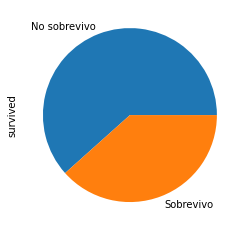

In [16]:
# validamos el % de la variable respuesta
titanic.survived.value_counts(True).rename({0: 'No sobrevivo', 1: 'Sobrevivo'}).plot.pie()

In [17]:
titanic.survived.value_counts(True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

## 2. Dividir la muestra en train y test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    titanic.drop(columns=['survived']),
    titanic.survived,
    test_size=.3,
    random_state=123
)

In [19]:
y_train.value_counts(True)

0    0.608347
1    0.391653
Name: survived, dtype: float64

In [20]:
print(x_train.select_dtypes(include=np.number).columns)
x_train.select_dtypes(include=np.number)

Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')


,age,sibsp,parch,fare
416,34.0,1,1,32.5000
801,31.0,1,1,26.2500
512,36.0,0,0,26.2875
455,29.0,0,0,7.8958
757,18.0,0,0,11.5000
...,...,...,...,...
98,34.0,0,1,23.0000
322,30.0,0,0,12.3500
382,32.0,0,0,7.9250
365,30.0,0,0,7.2500


In [22]:
# Paso 1: estandarizar  columna = (columna - mean) / std
from sklearn.preprocessing import StandardScaler
numeric_features = x_train.select_dtypes(include=np.number).columns.to_list()
numeric_features

['age', 'sibsp', 'parch', 'fare']

In [23]:
numeric_scaler = ('scaler', StandardScaler())

In [24]:
# Paso 2. Imputar los datos faltantes
from sklearn.impute import KNNImputer
numeric_imputer = ('knn_imputer', KNNImputer(n_neighbors=20))

In [25]:
from sklearn.pipeline import Pipeline
numeric_transformer = Pipeline(steps=[numeric_scaler, numeric_imputer])

In [26]:
categorical_features = x_train.select_dtypes(include='category').columns.to_list()
categorical_features

['pclass', 'sex', 'embarked']

In [27]:
# Paso 3: Imputar los datos faltantes de las variables categoricas
from sklearn.impute import SimpleImputer
categorical_imputer = ('mode_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))

In [31]:
# Paso 4: Dummyficar
from sklearn.preprocessing import OneHotEncoder
categorical_dummy = ('dummyficar', OneHotEncoder())
categorical_transformer = Pipeline(steps=[categorical_imputer, categorical_dummy])

In [32]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('knn_imputer',
                                                  KNNImputer(n_neighbors=20))]),
                                 ['age', 'sibsp', 'parch', 'fare']),
                                ('categorical',
                                 Pipeline(steps=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('dummyficar',
                                                  OneHotEncoder())]),
                                 ['pclass', 'sex', 'embarked'])])

In [45]:
x_train_prep = preprocessor.fit_transform(x_train)
x_train_prep

array([[ 0.28767042,  0.42278951,  0.80910353, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.07791192,  0.42278951,  0.80910353, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42750941, -0.45228645, -0.46702685, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.14783142, -0.45228645, -0.46702685, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.00799242, -0.45228645, -0.46702685, ...,  0.        ,
         0.        ,  1.        ],
       [-0.06192707, -0.45228645, -0.46702685, ...,  0.        ,
         1.        ,  0.        ]])

In [46]:
x_train_prep2 = pd.DataFrame(x_train_prep)
x_train_prep2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.287670,0.422790,0.809104,-0.015230,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.077912,0.422790,0.809104,-0.130344,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.427509,-0.452286,-0.467027,-0.129653,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.061927,-0.452286,-0.467027,-0.468397,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,-0.831042,-0.452286,-0.467027,-0.402014,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.287670,-0.452286,0.809104,-0.190203,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
619,0.007992,-0.452286,-0.467027,-0.386358,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
620,0.147831,-0.452286,-0.467027,-0.467859,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
621,0.007992,-0.452286,-0.467027,-0.480292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
preprocessor.transform(x_test)[1]

array([-0.03570726, -0.45228645, -0.46702685, -0.48067479,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ])

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
def model_CV(x,y,prepocessor, classifier, search_space):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
                                
    ])
    
    clf = GridSearchCV(pipeline,search_space, scoring='accuracy', cv=3, verbose=4)
    clf= clf.fit(x,y)
    return clf

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
search_space_rf = [{
    'classifier__n_estimators': [100,300,500],
    'classifier__max_depth': range(5,10)
}]

In [40]:
rf = model_CV(
    x=x_train,
    y=y_train,
    prepocessor = preprocessor,
    classifier=RandomForestClassifier(),
    search_space=search_space_rf
)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END classifier__max_depth=5, classifier__n_estimators=100;, score=0.788 total time=   0.2s
[CV 2/3] END classifier__max_depth=5, classifier__n_estimators=100;, score=0.803 total time=   0.2s
[CV 3/3] END classifier__max_depth=5, classifier__n_estimators=100;, score=0.821 total time=   0.2s
[CV 1/3] END classifier__max_depth=5, classifier__n_estimators=300;, score=0.788 total time=   0.5s
[CV 2/3] END classifier__max_depth=5, classifier__n_estimators=300;, score=0.798 total time=   0.5s
[CV 3/3] END classifier__max_depth=5, classifier__n_estimators=300;, score=0.826 total time=   0.5s
[CV 1/3] END classifier__max_depth=5, classifier__n_estimators=500;, score=0.793 total time=   0.8s
[CV 2/3] END classifier__max_depth=5, classifier__n_estimators=500;, score=0.803 total time=   0.8s
[CV 3/3] END classifier__max_depth=5, classifier__n_estimators=500;, score=0.836 total time=   0.8s
[CV 1/3] END classifier__max_depth=6, c

In [41]:
rf.best_params_

{'classifier__max_depth': 7, 'classifier__n_estimators': 100}

In [42]:
rf.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1])

In [43]:
pd.DataFrame(rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170734,0.012511,0.020709,0.000254,5,100,"{'classifier__max_depth': 5, 'classifier__n_es...",0.788462,0.802885,0.821256,0.804201,0.013421,14
1,0.446136,0.015005,0.044671,0.001145,5,300,"{'classifier__max_depth': 5, 'classifier__n_es...",0.788462,0.798077,0.826087,0.804208,0.015961,13
2,0.730067,0.010541,0.066563,0.001196,5,500,"{'classifier__max_depth': 5, 'classifier__n_es...",0.793269,0.802885,0.835749,0.810634,0.018187,4
3,0.163212,0.002963,0.020968,0.000326,6,100,"{'classifier__max_depth': 6, 'classifier__n_es...",0.778846,0.807692,0.830918,0.805819,0.021299,11
4,0.469469,0.013900,0.044820,0.001643,6,300,"{'classifier__max_depth': 6, 'classifier__n_es...",0.774038,0.822115,0.826087,0.807414,0.023655,10
5,0.747063,0.009852,0.070566,0.004771,6,500,"{'classifier__max_depth': 6, 'classifier__n_es...",0.778846,0.826923,0.826087,0.810619,0.022469,6
6,0.172036,0.014385,0.024309,0.003531,7,100,"{'classifier__max_depth': 7, 'classifier__n_es...",0.783654,0.831731,0.830918,0.815434,0.022475,1
7,0.895076,0.188095,0.118889,0.019558,7,300,"{'classifier__max_depth': 7, 'classifier__n_es...",0.783654,0.831731,0.816425,0.810603,0.020054,7
8,1.345298,0.575544,0.102491,0.047479,7,500,"{'classifier__max_depth': 7, 'classifier__n_es...",0.778846,0.831731,0.816425,0.809001,0.022219,9
9,0.166792,0.004970,0.021333,0.000441,8,100,"{'classifier__max_depth': 8, 'classifier__n_es...",0.788462,0.822115,0.806763,0.805780,0.013757,12


In [44]:
pd.DataFrame(rf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170734,0.012511,0.020709,0.000254,5,100,"{'classifier__max_depth': 5, 'classifier__n_es...",0.788462,0.802885,0.821256,0.804201,0.013421,14
1,0.446136,0.015005,0.044671,0.001145,5,300,"{'classifier__max_depth': 5, 'classifier__n_es...",0.788462,0.798077,0.826087,0.804208,0.015961,13
2,0.730067,0.010541,0.066563,0.001196,5,500,"{'classifier__max_depth': 5, 'classifier__n_es...",0.793269,0.802885,0.835749,0.810634,0.018187,4
3,0.163212,0.002963,0.020968,0.000326,6,100,"{'classifier__max_depth': 6, 'classifier__n_es...",0.778846,0.807692,0.830918,0.805819,0.021299,11
4,0.469469,0.013900,0.044820,0.001643,6,300,"{'classifier__max_depth': 6, 'classifier__n_es...",0.774038,0.822115,0.826087,0.807414,0.023655,10
